# Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('seaborn')
sns.set(font_scale=2.5)

In [2]:
data = pd.read_csv('../../dataset/titanic_train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* The Age, Cabin and Embarked have null values.. I will try to fix them
    * fix는 null value를 채운다는 뜻

Text(0.5, 1.0, 'Survived')

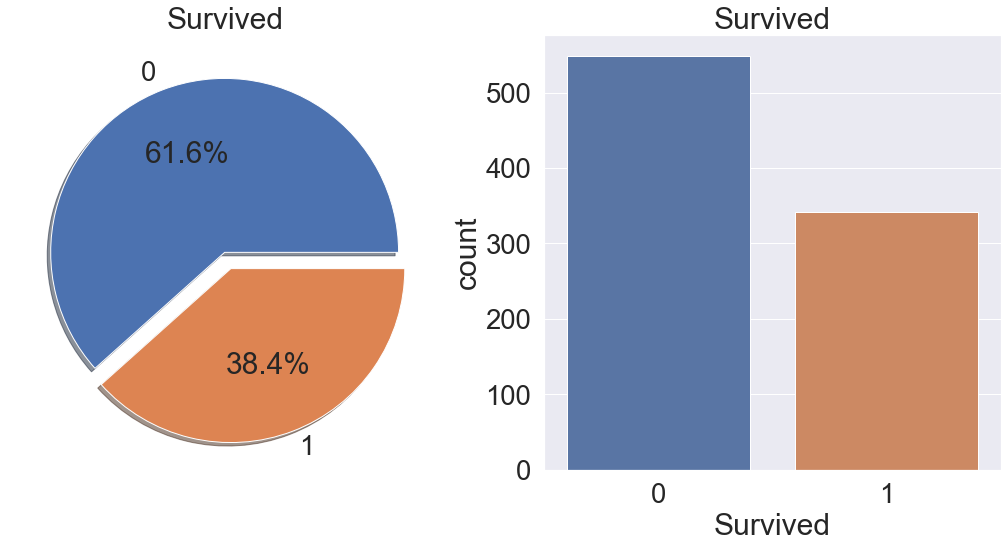

In [20]:
# How many Survived?

f, ax = plt.subplots(1,2,figsize=(18,8)) # figsize는 도형 크기를 인치 단위로 정의한 것 (가로,세로)
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True) # value_counts()는 데이터들의 숫자를 카운트해서 Seires 형태로 리턴
# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정 explode는 부채꼴이 파이 차트의 중심에서 벗어나는 정도                                      
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1]) # 범주별로 count한 값
ax[1].set_title('Survived')

> It is evident that not many passengers survived the accident.

> Out of 891 passengers in training set, only around 350 survived i.e Only **38.4%** of the total training set survived the crash.

> We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

> We will try to check the survival rate by using the different features of the dataset. Some of the feasures being Sex, Port Of Embarkation, Age, etc.

> First let us understand the different types of features.


* Types Of Features
    * **Categorical Features**:  
        * A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.  
        For example, gender is a categorical variable having two categories (male and female).  
        Now we cannot sort or give any ordering to such variables.  
        they are also known as Nominal Variables.  
        
    * **Ordinal Features**:
        * An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values.  
        For eg: If we have a feature like **Height** with values **Tall,Medium,Short**, then Height is a ordinal variavle.  
        Here we can have a relative sort in the variable.  
        
    * **Continous Feature**:
        * A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.  
        Continous Features in the dataset: Age  

## Analysing The Features

### Sex → Categorical Feature

In [35]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Sex:Survived vs Dead')

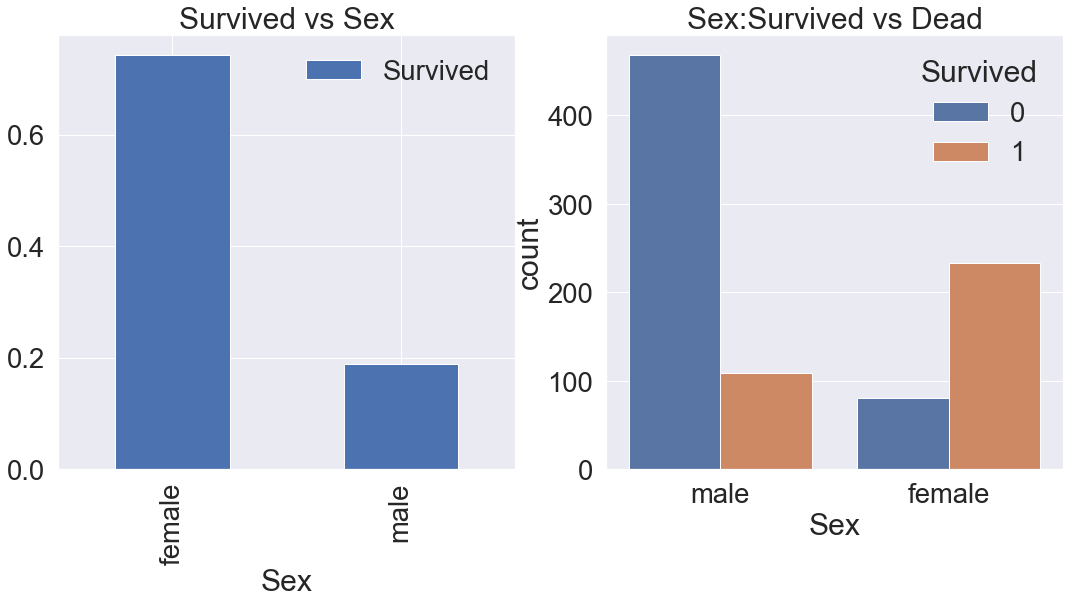

In [41]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue = 'Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a **women on the ship is around 75% while that for men in arouond 18-19%**.  
  
This looks to be a **very important** feature for modeling. But is it the best?? Lets check other features.

### Pclass → Ordinal Feature

In [52]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')
# crosstab(index,columns,values,rownames,colnames,aggfunc,margins,margins_name,dropna,normalize) margins는 총 합, values는 내부 값 cmap은 matplotlib colormap

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass:Survived vs Dead')

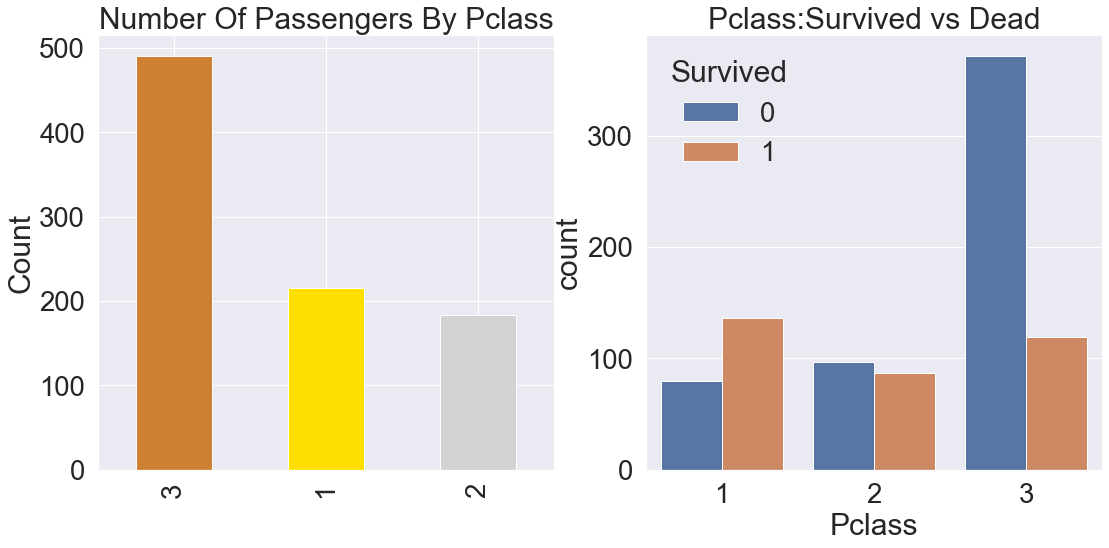

In [55]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

People say **Money Can't Buy Everything**. But we can clearly see that Passengers Of Pclass 1 were given a very high priority while rescue. Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around **25%**.  
  
For Pclass 1 survived is around **63%** while for Pclass2 is around **48%**. So money and status matters. Such a materialistic world.  
  
Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with **Sex and Pclass** Together.

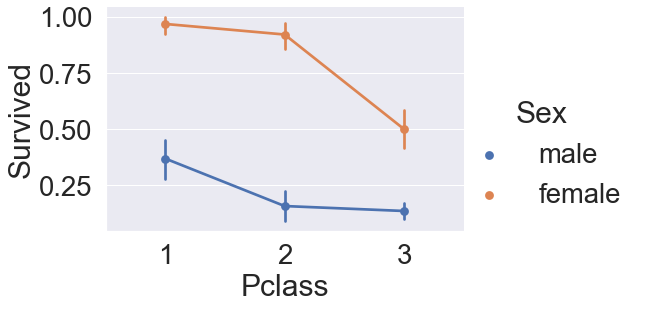

In [58]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data,aspect = 1.5)

We use **FactorPlot** in this case, because they make the seperation of categorical values easy.  
  
Looking at the **CrossTab** and the **FactorPlot**, we can easily infer that survival for **Women** from Pclass1 is about **95-96%**, as only 3 out of 94 women from Pclass1 died.  
  
It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.  
  
Looks like Pclass is also an improtant feature. Lets analyse other features.

### Age → Continous Feature

In [59]:
print('Oldest Passenger was of: ',data['Age'].max(),'Years')
print('Youngest Passenger was of: ',data['Age'].min(),'Years')
print('Average Age on the ship: : ',data['Age'].mean(),'Years')

Oldest Passenger was of:  80.0 Years
Youngest Passenger was of:  0.42 Years
Average Age on the ship: :  29.69911764705882 Years


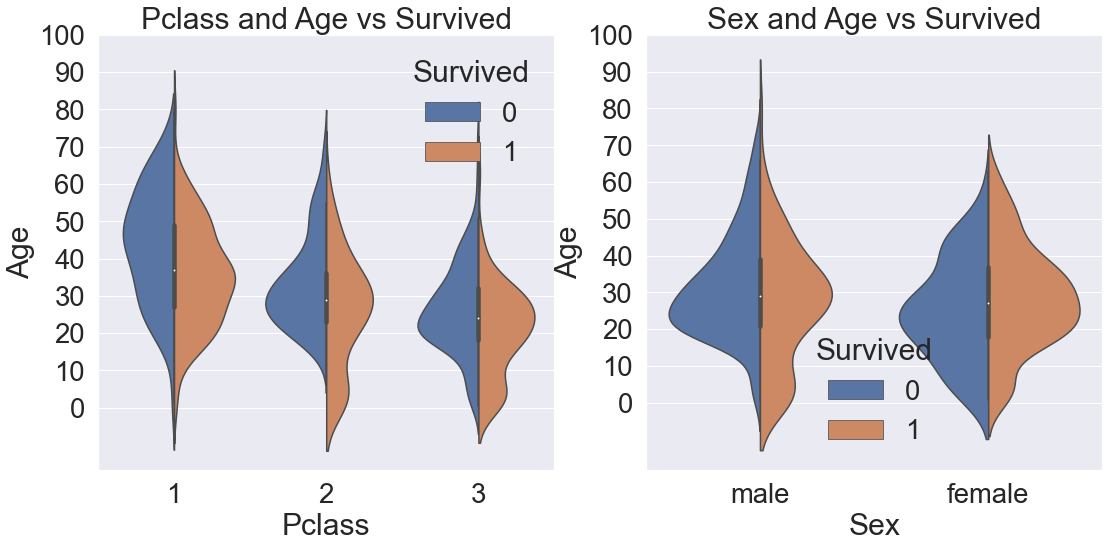

In [67]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue='Survived',data=data,split=True,ax=ax[0]) # split = True -> 하나의 violineplot에 hue를 반반씩
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue='Survived',data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

* Observations:  
    * The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.
      
    * Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.
      
    * For males, the survival chances decreases with an increase in age.

As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.  
  
But the problem is, there were many people with many different ages. We just can't assign a 4 year kid with the mean age that is 29years. Is there any way to find out what age-band does the passenger lie??  
  
we can check the **Name** feature. Looking upon the feature, we can see that the names have a aslutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

In [69]:
# 열 추가
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # ()로 그룹화 (모든 알파벳이 반복되는 문자열)+ 문자(.)으로 이루어진 부분을 추출 ex) "Yongjin."을 추출

Okay so here we are using the regex:[A-Za-z]+).. so what it does is, it looks for strings which lie between A-Z or a-z and followed by a .(dot). so we successfully extract the Initials from the Name.

In [75]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap="summer_r") # T는 row 와 col을 transpose pd.crosstab(data.Sex,data.Initial)과 같다

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [77]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
# replace는 새로운 DataFrame을 반환 but inplace를 True로 설정하면 원본 데이터를 치환

In [80]:
data.groupby('Initial')['Age'].mean() # lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filling NaN Ages

In [83]:
# Assigning the NaN values with the ceil values of the mean ages - NaN값을 age의 mean값을 올림하여 채움
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33 # age열이 null이고 Initial열이 Mr인 행 중에서 Age열만 가져오고 그열의 값을 33으로 정함
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [87]:
data.Age.isnull().any() # So no null values left finally

False

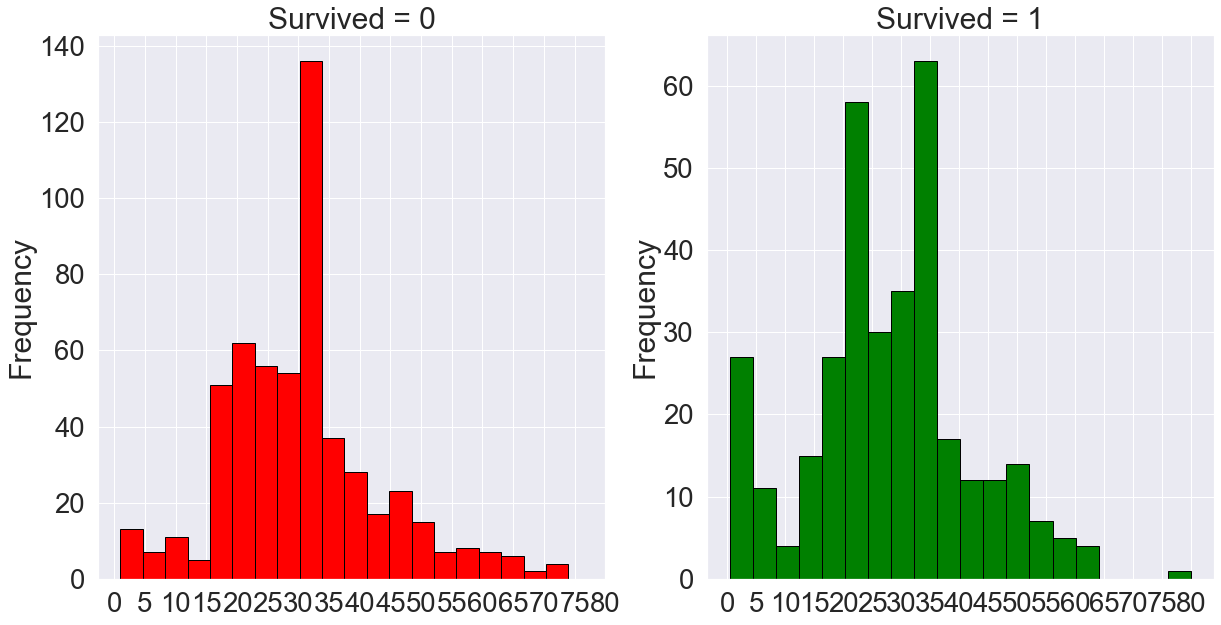

In [95]:
f, ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red') #bin은 x축에서 각 막대그래프의 폭
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived'] == 1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green') #bin은 x축에서 각 막대그래프의 폭
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)


* Observations:
    * The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).
    * The oldest Passenger was saved(80 years).
    * Maximum number of deaths were in the age group of 30-40.

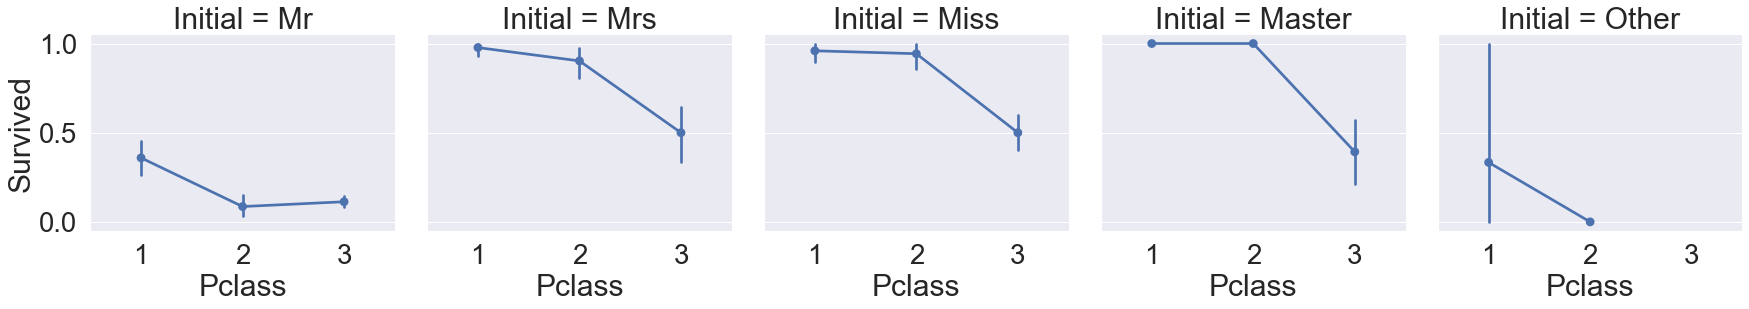

In [96]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)